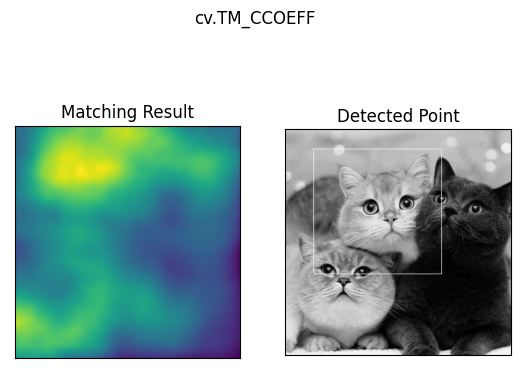

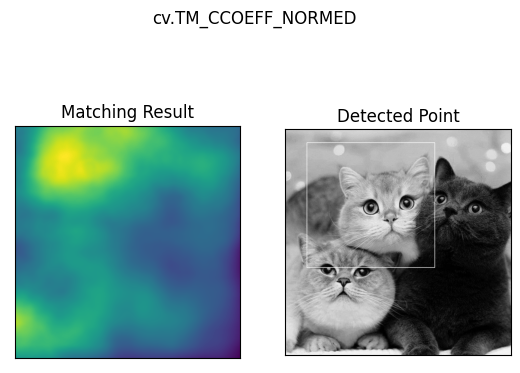

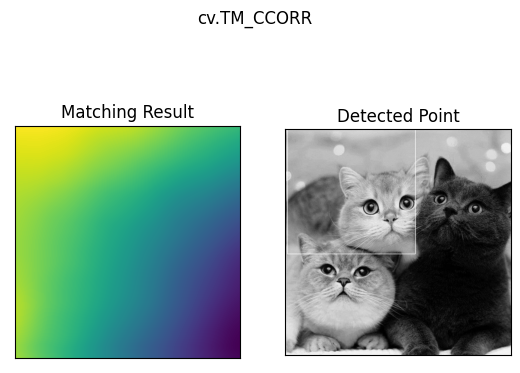

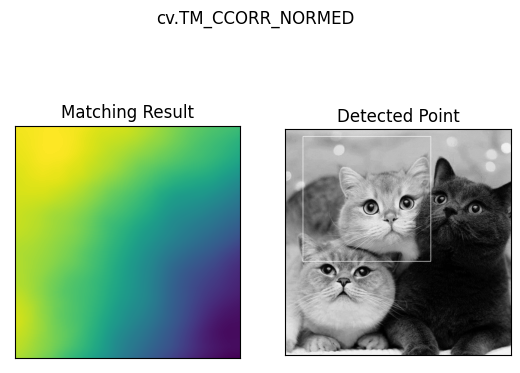

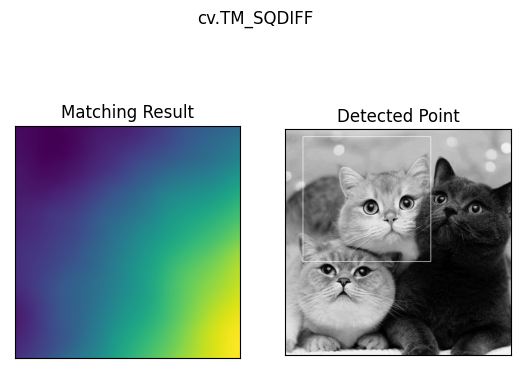

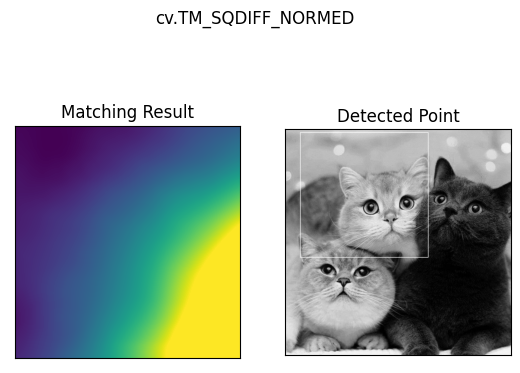

In [16]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('img_temp.jpg',0)
img2 = img.copy()
template = cv.imread('img_4.png',0)
w, h = template.shape[::-1]
# All the 6 methods for comparison in a list
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']
for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv.matchTemplate(img,template,method)
    #minVal	pointer to the returned minimum value; NULL is used if not required.
    #maxVal	pointer to the returned maximum value; NULL is used if not required.
    #minLoc	pointer to the returned minimum location (in 2D case); NULL is used if not required.
    #maxLoc	pointer to the returned maximum location (in 2D case); NULL is used if not required.
    #mask	optional mask used to select a sub-array.

    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv.rectangle(img,top_left, bottom_right, 255, 2)
    plt.subplot(121),plt.imshow(res)
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

In [17]:
import cv2
import sys
import os.path
import numpy as np

def drawMatches(img1, kp1, img2, kp2, matches):

    rows1 = img1.shape[0]
    cols1 = img1.shape[1]
    rows2 = img2.shape[0]
    cols2 = img2.shape[1]

    out = np.zeros((max([rows1,rows2]),cols1+cols2,3), dtype='uint8')
    out[:rows1,:cols1] = np.dstack([img1])
    out[:rows2,cols1:] = np.dstack([img2])
    for mat in matches:
        img1_idx = mat.queryIdx
        img2_idx = mat.trainIdx
        (x1,y1) = kp1[img1_idx].pt
        (x2,y2) = kp2[img2_idx].pt

        cv2.circle(out, (int(x1),int(y1)), 4, (255, 0, 0, 1), 1)
        cv2.circle(out, (int(x2)+cols1,int(y2)), 4, (255, 0, 0, 1), 1)
        cv2.line(out, (int(x1),int(y1)), (int(x2)+cols1,int(y2)), (255, 0, 0, 1), 1)

    return out

In [20]:
img1 = cv.imread('img_temp.jpg')        # queryImage
img2 = cv.imread('img_4.png')         # trainImage
# Initiate SIFT detector
sift = cv.SIFT_create()
# find the keypoints and descriptors with SIFT
gray1 = cv.cvtColor(img1,cv.COLOR_BGR2GRAY)
gray2 = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)

kp1, des1 = sift.detectAndCompute(gray1,None)
kp2, des2 = sift.detectAndCompute(gray2,None)
# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.match(des1,des2)
matches = sorted(matches, key=lambda val: val.distance)
img3 = drawMatches(img1,kp1,img2,kp2,matches[:25])
# Show the image
cv2.imshow('Matched Features', img3)
cv2.waitKey(0)
cv2.destroyWindow('Matched Features')

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'
